In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import urllib
import shutil
%matplotlib inline

In [ ]:
# Download and preprocess COVID-19 data from JHU-CSSE
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [ ]:

data = pd.read_csv(url)
data.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
data.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135
288,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,263921,264127,264127,264127,264127,264127,264127,264127,264276,264276


In [ ]:
# make a geometry object from Lat, Long
geo = gpd.points_from_xy(data['Long'], data['Lat'])
# give the geometry to geopandas together with data
gdata = gpd.GeoDataFrame(data, geometry=geo)
gdata.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,geometry
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,POINT (67.70995 33.93911)
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,POINT (20.16830 41.15330)
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,POINT (1.65960 28.03390)
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,POINT (1.52180 42.50630)
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,POINT (17.87390 -11.20270)


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world= world.rename(columns={'name': 'Country/Region'})
world.head()

<ipython-input-97-9d1c6046608b>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,Country/Region,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
countries=world['Country/Region']

<Axes: >

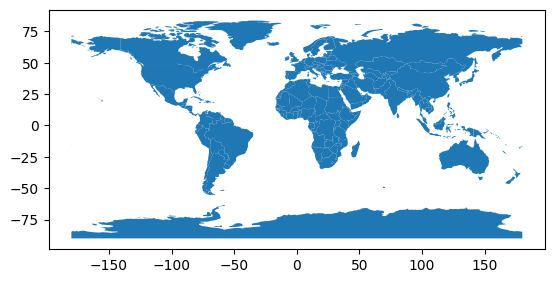

In [ ]:
world.plot()

In [ ]:
gdata=gdata[gdata['Country/Region'].isin(countries)]
len(gdata)


240

In [ ]:
gdata.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,geometry
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,POINT (67.70995 33.93911)
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,POINT (20.16830 41.15330)
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,POINT (1.65960 28.03390)
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,POINT (17.87390 -11.20270)
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,POINT (23.34700 -71.94990)


In [ ]:
country_data_covid = gdata.groupby('Country/Region').sum()

<ipython-input-104-b4f5f768f5e1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_data_covid = gdata.groupby('Country/Region').sum()


In [ ]:
len(country_data_covid)

152

In [ ]:
country_data_covid.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
Antarctica,-71.94990,23.347000,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11


In [127]:

latest_data = pd.merge(world,country_data_covid, on='Country/Region')

In [128]:
latest_data.head()

,pop_est,continent,Country/Region,iso_a3,gdp_md_est,geometry,Lat,Long,1/22/20,1/23/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",-17.713400,178.065000,0,0,...,68889,68889,68897,68897,68897,68897,68897,68897,68897,68898
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",-6.369028,34.888822,0,0,...,42823,42846,42846,42846,42846,42846,42846,42846,42906,42906
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",708.855600,-1202.597900,0,2,...,4602806,4603795,4608456,4609042,4609458,4609751,4611428,4612219,4613054,4617095
3,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",48.019600,66.923700,0,0,...,1498668,1498668,1498668,1498668,1498668,1498668,1498668,1498668,1498668,1498668
4,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",41.377491,64.585262,0,0,...,250932,251071,251071,251071,251071,251071,251071,251071,251247,251247


In [129]:
len(latest_data)

152

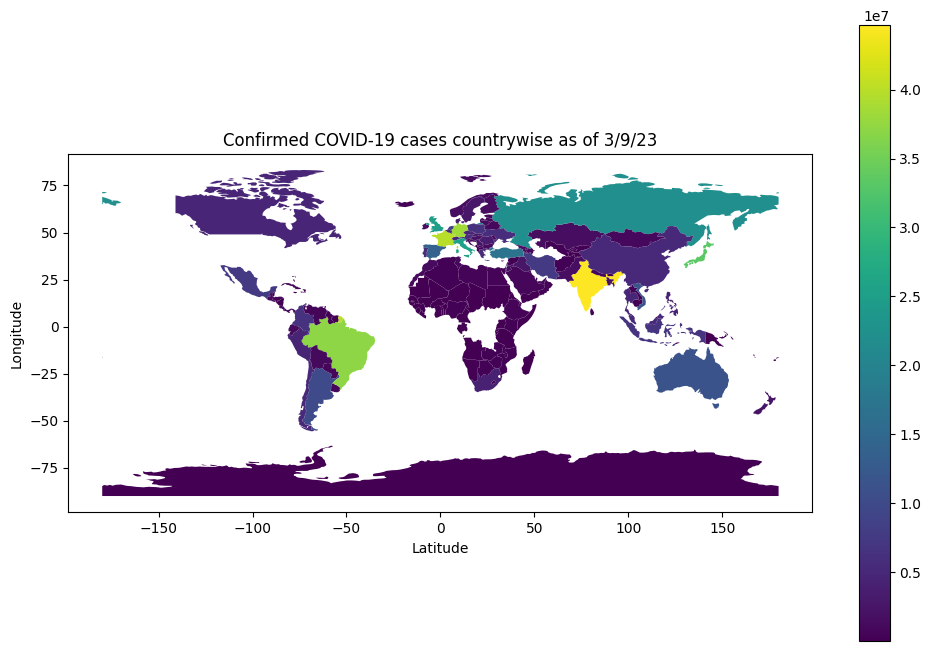

In [138]:
# plot coloring counties by number of confirmed cases
fig, ax = plt.subplots(figsize=(12, 8))
latest_data.plot(ax=ax, column='3/9/23', legend=True) #legend_kwds={'label': '# confimed cases', 'orientation':'horizontal'}
# label the counties
# for x,y,Country in zip(latest_data['Lat'], latest_data['Long'],latest_data['Country/Region']): ax.text(x,y, Country, color='black',size=5)
ax.set_title('Confirmed COVID-19 cases countrywise as of 3/9/23')
ax.set_xlabel('Latitude'); ax.set_ylabel('Longitude');